In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


In [2]:
#Study Data Files
mouse_metadata = "Resources/Mouse_metadata.csv"
study_results = "Resources/Study_results.csv"
#Files read
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


In [3]:
#Combine Data
combined_data = pd.merge(mouse_metadata, study_results)
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
#Description of the Data
combined_data.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [5]:
#count
summary_stats = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()
summary_stats

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

In [6]:
#Calculate mean
summary_mean = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
summary_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [7]:
#Calculate median
summary_median = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [8]:
#Calculate variance
summary_variance = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summary_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [9]:
#Calculate standard deviation
summary_standard_deviation = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
summary_standard_deviation

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [10]:
#Calculate SEM
summary_sem = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [11]:
#DataFrame


In [12]:
#Create DataFrame
data_df = pd.DataFrame({"Mean":summary_mean,"Median":summary_median,"Variance":summary_variance,"Standard Deviation":summary_standard_deviation,"Sem":summary_sem})  
data_df


,Mean,Median,Variance,Standard Deviation,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


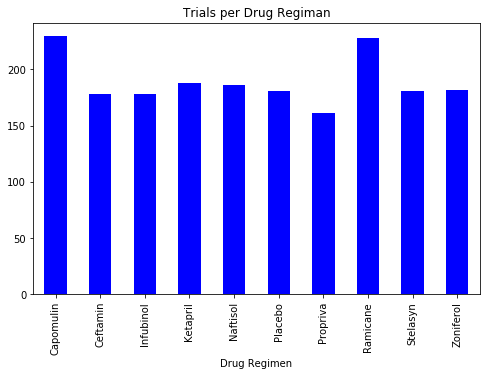

In [13]:
#Bar Graph using Pandas


summary_stats.plot(kind="bar", figsize=(8,5), color = "b", legend=False)

plt.title("Trials per Drug Regiman")

plt.show()

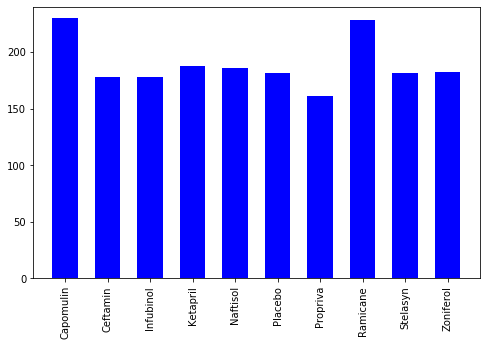

In [14]:
#Bar graph using pyploy


#x axis and tick locations
x_axis = np.arange(len(summary_stats))
tick_location = [value for value in x_axis]

plt.figure(figsize = (8,5))
plt.bar(x_axis, summary_stats, color = "b", width = .6)
plt.xticks(tick_location, summary_stats.index.values, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(summary_stats)+10)



plt.show()

In [15]:
#pie plot using pandas
gender = combined_data.groupby("Sex").count()
gender


,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,935,935,935,935,935,935,935
Male,958,958,958,958,958,958,958


In [16]:
gender_df = gender["Drug Regimen"]
gender_df = gender_df.rename(columns={"Drug Regimen": "Count"})
gender_df

Sex
Female    935
Male      958
dtype: int64

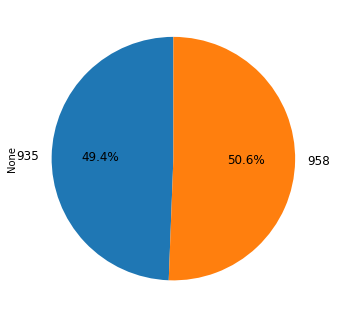

In [17]:
plt.figure(figsize=(12,8))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Sex", ax=ax1, autopct='%1.1f%%', 
 startangle=90, labels=gender_df, fontsize=12)



(-1.105172849624489,
 1.1027130801595115,
 -1.1045613723658971,
 1.1002172082078998)

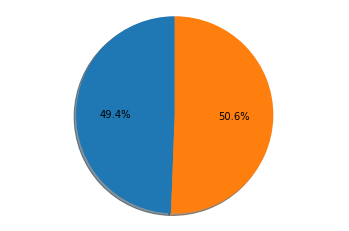

In [18]:
#pie plot using pyplot

plt.pie(gender_df,autopct="%1.1f%%", shadow=True, startangle=90)

plt.axis("equal")

In [19]:
#final tumor volume
volume_data = combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin") | (combined_data["Drug Regimen"] == "Ramicane") | (combined_data["Drug Regimen"] == "Infubinol") | (combined_data["Drug Regimen"] == "Ceftamin"),:]

quartiles = volume_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 40.2201707875
The upper quartile of temperatures is: 50.356470630000004
The interquartile range of temperatures is: 10.136299842500001
The the median of temperatures is: 45.0 
Values below 25.01572102375 could be outliers.
Values above 65.56092039375001 could be outliers.


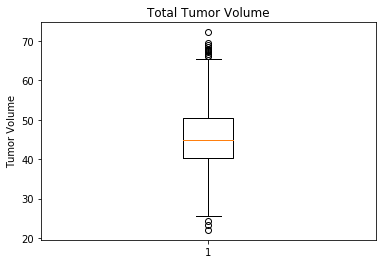

In [20]:
#box and whisker plot

volume = volume_data['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.boxplot(volume)
ax1.set_title("Total Tumor Volume")
ax1.set_ylabel("Tumor Volume")
plt.show()

In [21]:
#line plot
capomulin = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]

capomulin


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [22]:
single_mouse = capomulin.loc[capomulin["Mouse ID"] == "s185"]
single_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


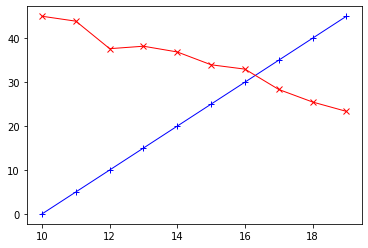

In [23]:
t_volume = single_mouse.loc[:, ["Tumor Volume (mm3)"]]
x_axis = single_mouse.loc[:, ["Timepoint"]]


plt.plot(x_axis, marker="+",color="blue", linewidth=1, label="Timepoint")
plt.plot(t_volume, marker="x", color="red", linewidth=1, label='Tumor Volume')
plt.show()

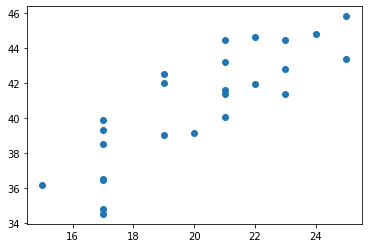

In [24]:
#scatterplot
campomulin_average = capomulin.groupby(["Mouse ID"]).mean()
plt.scatter(campomulin_average["Weight (g)"], campomulin_average["Tumor Volume (mm3)"])

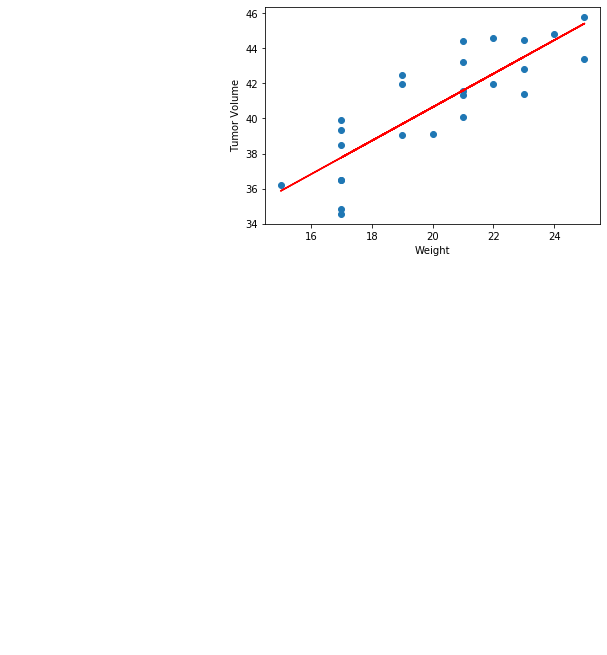

In [28]:
x_values = campomulin_average["Weight (g)"]
y_values = campomulin_average["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()

In [29]:
correlation = st.pearsonr(campomulin_average["Weight (g)"], campomulin_average["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [32]:
data_chart = linregress(campomulin_average["Weight (g)"], campomulin_average["Tumor Volume (mm3)"])
data_chart

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)